In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import datetime

In [3]:
!dir inputs

 Volume in drive D has no label.
 Volume Serial Number is F6A2-5568

 Directory of D:\PythonTraining\Trading\other_fx\inputs

2021/04/19  21:36    <DIR>          .
2021/04/19  21:36    <DIR>          ..
2021/04/18  16:22         2,573,622 EURGBP_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,576,106 EURJPY_M10_202003020000_202104162350.csv
2021/04/18  16:21         2,571,608 EURUSD_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,585,572 GBPJPY_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,578,380 GBPUSD_M10_202003020000_202104162350.csv
2021/04/18  15:32    <DIR>          m1
2021/04/18  16:23    <DIR>          m5
2021/04/18  16:22         2,571,975 USDJPY_M10_202003020000_202104162350.csv
2021/04/19  21:36         2,577,705 USDJPY_M10_202003020000_202104191530.csv
               7 File(s)     18,034,968 bytes
               4 Dir(s)  466,170,368,000 bytes free


In [4]:
dataset = pd.read_csv('inputs/USDJPY_M10_202003020000_202104191530.csv', sep='\t')
dataset

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2020.03.02,00:00:00,107.513,107.754,107.502,107.664,319,0,3
1,2020.03.02,00:10:00,107.656,107.769,107.625,107.704,369,0,4
2,2020.03.02,00:20:00,107.704,107.734,107.679,107.717,139,0,11
3,2020.03.02,00:30:00,107.717,107.731,107.708,107.708,87,0,11
4,2020.03.02,00:40:00,107.698,107.698,107.574,107.578,210,0,8
...,...,...,...,...,...,...,...,...,...
42215,2021.04.19,14:50:00,108.165,108.167,108.113,108.120,294,0,0
42216,2021.04.19,15:00:00,108.119,108.159,108.112,108.115,292,0,0
42217,2021.04.19,15:10:00,108.115,108.128,108.074,108.099,349,0,0
42218,2021.04.19,15:20:00,108.099,108.118,108.064,108.066,405,0,0


In [5]:
df = pd.DataFrame()

df['<CLOSE>'] = dataset['<CLOSE>']
# df['<OPEN>'] = dataset['<OPEN>'].shift(1).fillna(0)
# df['<HIGH>'] = dataset['<HIGH>'].shift(1).fillna(0)
# df['<LOW>'] = dataset['<LOW>'].shift(1).fillna(0)
# df['<TICKVOL>'] = dataset['<TICKVOL>'].shift(1).fillna(0)
# df['<VOL>'] = dataset['<VOL>'].shift(1).fillna(0)
for i in range(1, 20):
    df['shift%s'%i] = dataset['<CLOSE>'].shift(i)

df['SMA20'] = df['shift1'].shift(1).rolling(20).mean().fillna(0)
df['SMA50'] = df['shift1'].shift(1).rolling(50).mean().fillna(0)
df['SMA100'] = df['shift1'].shift(1).rolling(100).mean().fillna(0)


In [6]:
df

,<CLOSE>,shift1,shift2,shift3,shift4,shift5,shift6,shift7,shift8,shift9,...,shift13,shift14,shift15,shift16,shift17,shift18,shift19,SMA20,SMA50,SMA100
0,107.664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
1,107.704,107.664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
2,107.717,107.704,107.664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
3,107.708,107.717,107.704,107.664,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
4,107.578,107.708,107.717,107.704,107.664,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42215,108.120,108.164,108.165,108.178,108.150,108.144,108.119,108.173,108.140,108.152,...,108.071,108.040,108.053,108.074,108.084,108.082,108.072,108.11080,108.36536,108.54664
42216,108.115,108.120,108.164,108.165,108.178,108.150,108.144,108.119,108.173,108.140,...,108.047,108.071,108.040,108.053,108.074,108.084,108.082,108.11370,108.35622,108.54058
42217,108.099,108.115,108.120,108.164,108.165,108.178,108.150,108.144,108.119,108.173,...,108.109,108.047,108.071,108.040,108.053,108.074,108.084,108.11490,108.34592,108.53395
42218,108.066,108.099,108.115,108.120,108.164,108.165,108.178,108.150,108.144,108.119,...,108.161,108.109,108.047,108.071,108.040,108.053,108.074,108.11705,108.33506,108.52728


In [7]:
# df[1439:]
X = df[1439:].drop(['<CLOSE>'], axis=1)
y =  df[1439:]['<CLOSE>']

In [8]:
X

,shift1,shift2,shift3,shift4,shift5,shift6,shift7,shift8,shift9,shift10,...,shift13,shift14,shift15,shift16,shift17,shift18,shift19,SMA20,SMA50,SMA100
1439,106.427,106.382,105.985,106.255,106.703,107.998,108.020,107.994,108.077,108.345,...,108.333,108.165,108.300,108.280,108.152,108.152,107.915,107.76970,107.48056,106.82191
1440,106.392,106.427,106.382,105.985,106.255,106.703,107.998,108.020,107.994,108.077,...,108.217,108.333,108.165,108.300,108.280,108.152,108.152,107.69500,107.46492,106.82908
1441,106.329,106.392,106.427,106.382,105.985,106.255,106.703,107.998,108.020,107.994,...,108.349,108.217,108.333,108.165,108.300,108.280,108.152,107.62205,107.45302,106.83332
1442,106.170,106.329,106.392,106.427,106.382,105.985,106.255,106.703,107.998,108.020,...,108.345,108.349,108.217,108.333,108.165,108.300,108.280,107.54275,107.44262,106.83887
1443,105.983,106.170,106.329,106.392,106.427,106.382,105.985,106.255,106.703,107.998,...,108.077,108.345,108.349,108.217,108.333,108.165,108.300,107.44365,107.42978,106.84225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42215,108.164,108.165,108.178,108.150,108.144,108.119,108.173,108.140,108.152,108.161,...,108.071,108.040,108.053,108.074,108.084,108.082,108.072,108.11080,108.36536,108.54664
42216,108.120,108.164,108.165,108.178,108.150,108.144,108.119,108.173,108.140,108.152,...,108.047,108.071,108.040,108.053,108.074,108.084,108.082,108.11370,108.35622,108.54058
42217,108.115,108.120,108.164,108.165,108.178,108.150,108.144,108.119,108.173,108.140,...,108.109,108.047,108.071,108.040,108.053,108.074,108.084,108.11490,108.34592,108.53395
42218,108.099,108.115,108.120,108.164,108.165,108.178,108.150,108.144,108.119,108.173,...,108.161,108.109,108.047,108.071,108.040,108.053,108.074,108.11705,108.33506,108.52728


# Make Predict model by LightGBM

In [9]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [10]:
X.shape

(40781, 22)

In [11]:
y.shape

(40781,)

In [12]:
X.columns.tolist()

['shift1',
 'shift2',
 'shift3',
 'shift4',
 'shift5',
 'shift6',
 'shift7',
 'shift8',
 'shift9',
 'shift10',
 'shift11',
 'shift12',
 'shift13',
 'shift14',
 'shift15',
 'shift16',
 'shift17',
 'shift18',
 'shift19',
 'SMA20',
 'SMA50',
 'SMA100']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [14]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [15]:
# LightGBM parameters
params = {
        'task' : 'train',
        'boosting':'gbdt',
        'objective' : 'regression',
        'metric' : {'rmse'},
        'num_leaves':78,
        'drop_rate':0.05,
        'learning_rate':0.005,
        'seed':0,
        'verbose':0,
        'device': 'cpu',
        'max_depth': -1, 
        'random_state': 0
}

In [16]:
evaluation_results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100000,
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['Train', 'Valid'],
                evals_result=evaluation_results,
                early_stopping_rounds=1000,
                verbose_eval=100)

[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
Training until validation scores don't improve for 1000 rounds
[100]	Train's rmse: 0.709871	Valid's rmse: 1.0604
[200]	Train's rmse: 0.431801	Valid's rmse: 0.645575
[300]	Train's rmse: 0.26432	Valid's rmse: 0.395669
[400]	Train's rmse: 0.164347	Valid's rmse: 0.246363
[500]	Train's rmse: 0.105919	Valid's rmse: 0.159014
[600]	Train's rmse: 0.0732608	Valid's rmse: 0.109842
[700]	Train's rmse: 0.0562826	Valid's rmse: 0.0838995
[800]	Train's rmse: 0.0481206	Valid's rmse: 0.0712214
[900]	Train's rmse: 0.0442714	Valid's rmse: 0.0658086
[1000]	Train's rmse: 0.0423238

In [17]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [18]:
y_pred

array([105.5591696 , 105.57372179, 105.5964557 , ..., 108.08447089,
       108.09116648, 108.02380624])

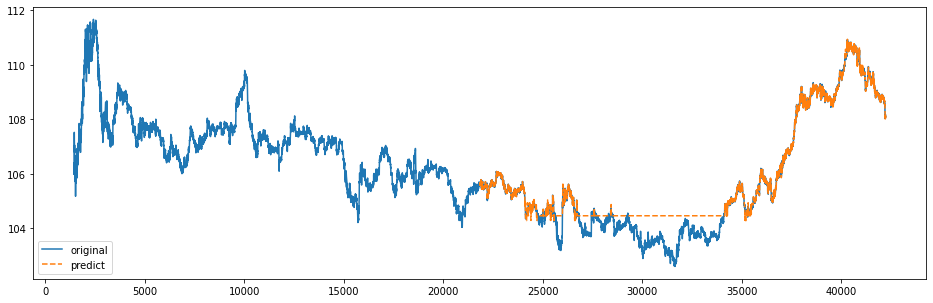

In [19]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

In [20]:
len(y_val)

4078

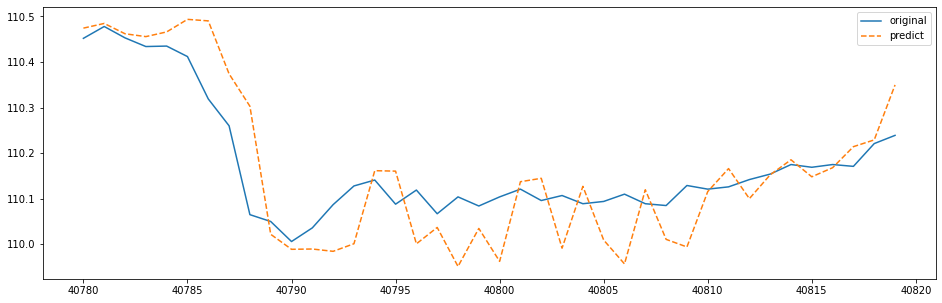

In [21]:
plt.figure(figsize=(16,5))
plt.plot(y[-1440:-1400], label='original')
plt.plot(y_[-1440:-1400], '--', label='predict')
plt.legend()

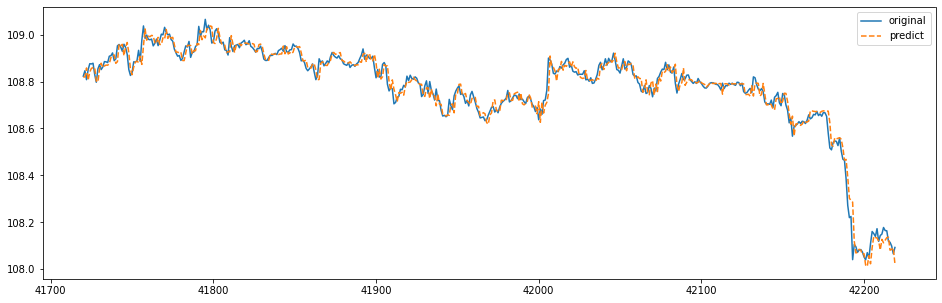

In [22]:
plt.figure(figsize=(16,5))
plt.plot(y[-500:], label='original')
plt.plot(y_[-500:], '--', label='predict')
plt.legend()

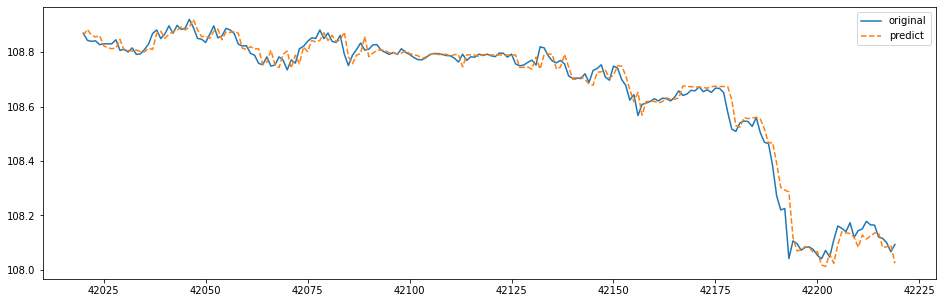

In [23]:
plt.figure(figsize=(16,5))
plt.plot(y[-200:], label='original')
plt.plot(y_[-200:], '--', label='predict')
plt.legend()

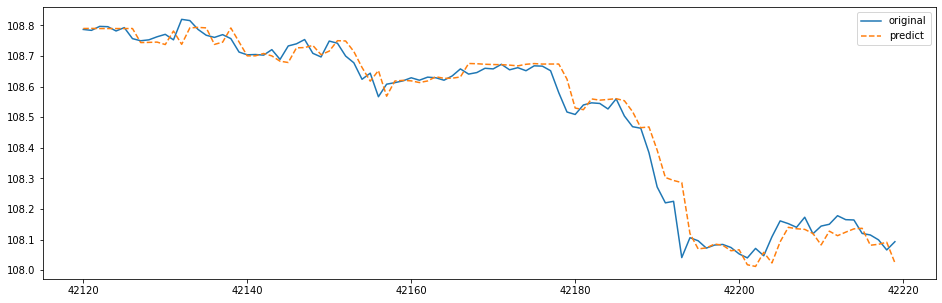

In [24]:
plt.figure(figsize=(16,5))
plt.plot(y[-100:], label='original')
plt.plot(y_[-100:], '--', label='predict')
plt.legend()

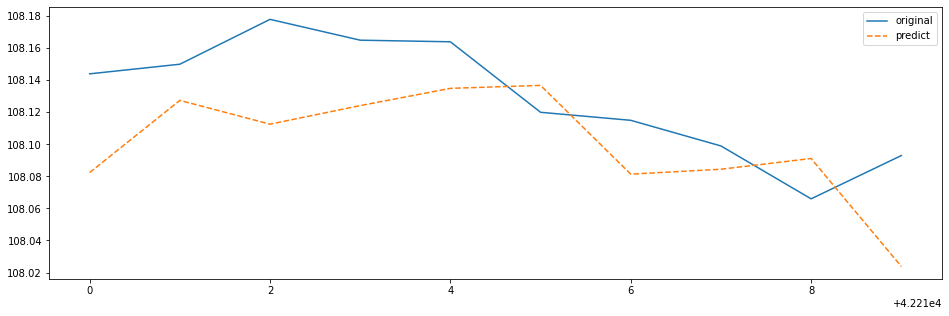

In [25]:
plt.figure(figsize=(16,5))
plt.plot(y[-10:], label='original')
plt.plot(y_[-10:], '--', label='predict')
plt.legend()

# make model

In [26]:
import pickle

filename='model.pkl'
pickle.dump(gbm, open(filename, 'wb'))